# GRIP - The Spark Foundation
## Data Science & Business Analytics Internship
### Task 1- Prediction using Supervised ML
Predict the percentage of a student based on the study hour.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset and Reading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
#displaying the rows
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Dimension of dataset
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#details on the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

### Exploring the dataset

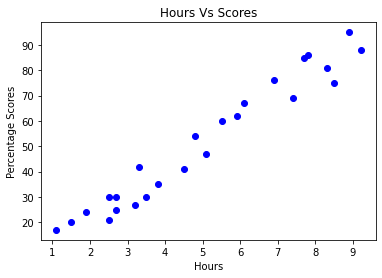

In [9]:
# Data Visualization through scatter plot
plt.scatter(df['Hours'], df['Scores'], color='Blue',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.show()

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

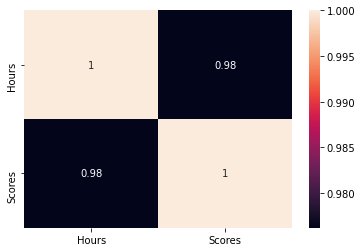

In [11]:
sns.heatmap(df.corr(), annot=True)

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

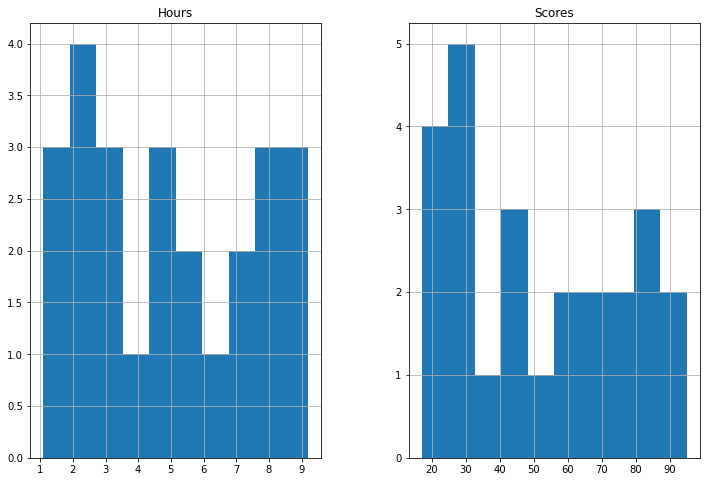

In [12]:
df.hist(figsize=(12,8))

A histogram gives us an idea about nature of distribution of data i.e. whether the data is normally distributed or it is skewed either positively or negetively. In the above histogram, we can observe for both Hours and Scores, there is a very minor skew in the positive side because many of the data points lies in this region though this very slight skew does not indicate that outliers are present in the data.

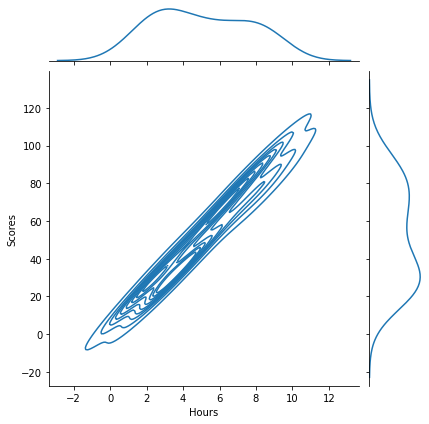

In [13]:
# Data Visualization through joint plot
sns.jointplot(x=df['Hours'], y=df['Scores'], kind="kde")
#2D KDE plot

Joint plot quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

Text(0, 0.5, 'Hours')

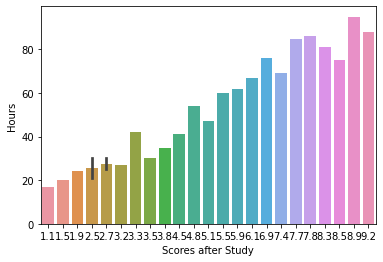

In [14]:
#plotting the result
sns.barplot(x=df["Hours"], y=df["Scores"])
# Bar chart showing the scores of students vs hours they put in

plt.xlabel("Scores after Study")
# Add label for vertical axis

plt.ylabel("Hours")
# Add label for vertical axis

## LINEAR REGRESSION

In [15]:
# Seperating dependent and independent variables
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [16]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [17]:
#Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Text(0.5, 1.0, 'Plotting the regression line')

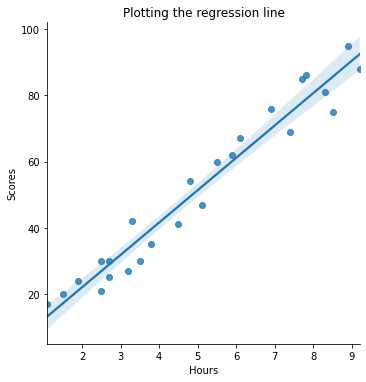

In [18]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")
#sns.regplot(x="Hours", y="Scores", data=df)

Implot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables.
From the graph above, we can clearly observe that there is a positive linear relationship between the number of hours studied and the scores obtained.

In [19]:
#Predicting the Test set results
Y_pred = regressor.predict(X_test)
Y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [20]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df1

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [21]:
# Given Problem Evaluated using the trained model (approx)
from sklearn import metrics
print("Predicted Accuracy :")
metrics.r2_score(Y_test,Y_pred)


Predicted Accuracy :


0.955570080138813

In [22]:
# Error Evaluation in Prediction Model

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.691397441397438
Mean Squared Error: 25.463280738222547
Root Mean Squared Error: 5.046115410711743
R-2: 0.955570080138813


Mean Absolute Error is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions.

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

R-squared is a goodness-of-fit measure for linear regression models. As we can see that R-squared value is approx 0.955. r squared value basically tells us how much variance is explained by dependent variable is based on independent variables. In this case, around 95.5% of variance is explained which is a very good score as per industry standards.

In [23]:
Hours = [9.25]
predict=regressor.predict([Hours])
print("No of Hours = {}".format([Hours]))
print("Predicted Score = {}".format(predict))

No of Hours = [[9.25]]
Predicted Score = [92.14523315]


## Conclusion :

From the above model, we predicted that if a student studies for 9.25 hours per day then he/she are likely to score 92.14 percent with an accuracy of 92%.

Hence, Task 1 completed.


### Thank you!